In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import logging
rl = logging.getLogger()
rl.setLevel(logging.INFO)

In [3]:
import sys
sys.path.append("..")

In [4]:
print(sys.version)

2.7.15 (default, Jun 21 2018, 11:39:23) 
[GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]


In [5]:
import qnm

In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('text', usetex = True)

# Exploring values of inversion error function

In [6]:
qnm.radial.leaver_cf_trunc_inversion(0.4-0.2j, 0., -2, 2, 4.+0.j, 0, 300, 1.+0.j)

(-3.7832264403820357-1.8368923380529323j)

In [7]:
Npts=100
omegar=np.arange(0.2, .5, .3/Npts)
omegai=np.arange(-0.2, -0., .2/Npts)
Or, Oi = np.meshgrid(omegar, omegai)
Os = Or + 1.j*Oi

In [8]:
leav1 = lambda omega: qnm.radial.leaver_cf_trunc_inversion(omega, 0., -2, 2, 4.+0.j, 0, 300, 0.j)
leavf = np.vectorize(leav1)
Leavers = leavf(Os)

In [9]:
def leav1(omega): 
    inv_err, cf_err, its = qnm.radial.leaver_cf_inv_lentz(omega, 0., -2, 2, 4.+0.j, 0)
    # logging.info("Lentz terminated with cf_err={}, its={}".format(cf_err, its))
    return inv_err
leavf = np.vectorize(leav1)
Leavers = leavf(Os)

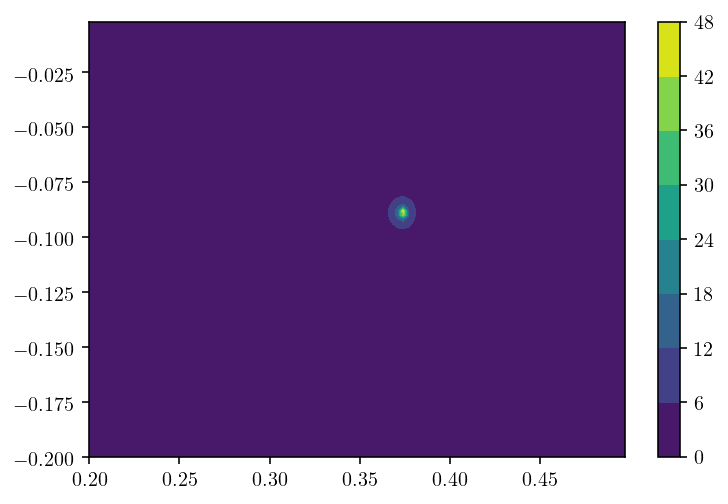

In [10]:
CS = plt.contourf(Or, Oi, 1/np.abs(Leavers))
plt.colorbar(CS)
plt.show()

In [11]:
qnm.angular.sep_const_closest(4., -2, 0.1, 2, 20)

(3.7259203780062347+0j)

In [12]:
Npts=120
orrange=[0., .4]
oirange=[-2.3,-0.75]
omegar=np.arange(orrange[0], orrange[1], (orrange[1]-orrange[0])/Npts)
omegai=np.arange(oirange[0], oirange[1], (oirange[1]-oirange[0])/Npts)
Or, Oi = np.meshgrid(omegar, omegai)
Os = Or + 1.j*Oi

In [13]:
a = 1.e-6
s = -2
m = 2
l = 2

n_inv = 6
Nr = 300
r_N = 0.
l_max = 20

def leav1(omega):
    inv_err, _, _ = qnm.radial.leaver_cf_inv_lentz(omega, a, s, m,
                                               qnm.angular.sep_const_closest(qnm.angular.swsphericalh_A(s,l,m),
                                                                                 s, a*omega, m, l_max),
                                               n_inv, N_max=400)
    return inv_err

leavf = np.vectorize(leav1)
Leavers = leavf(Os)

In [14]:
leav1(-2.j+1.e-30)

(-6.458744650217341e-11-1.8932675117344805e-05j)

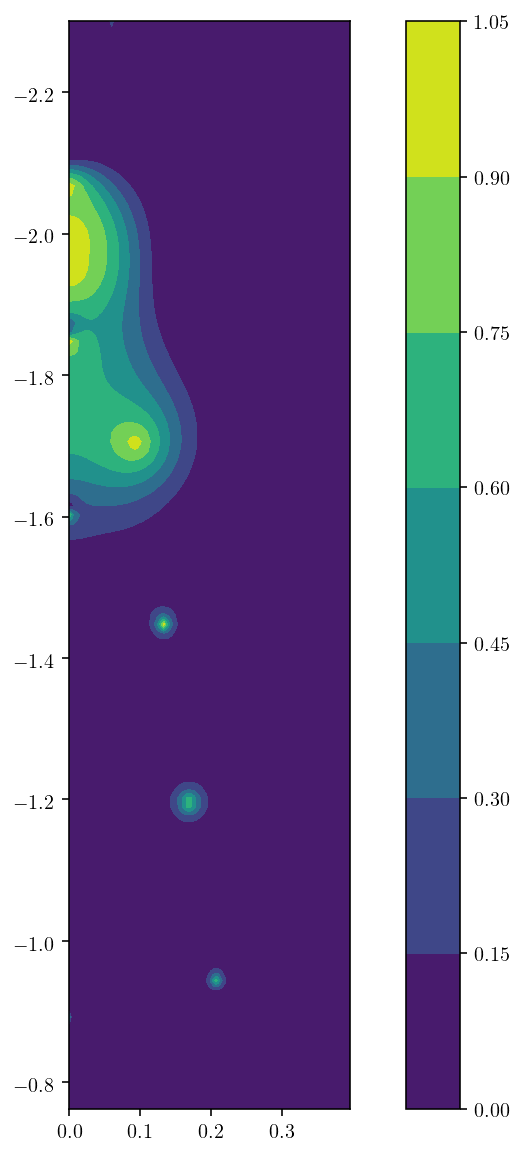

In [15]:
plt.figure(figsize=(10,10))
CS = plt.contourf(Or, Oi, np.exp(-np.abs(Leavers)))
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
plt.colorbar(CS)
plt.savefig("test.png", bbox_inches="tight", dpi=300)
plt.show()

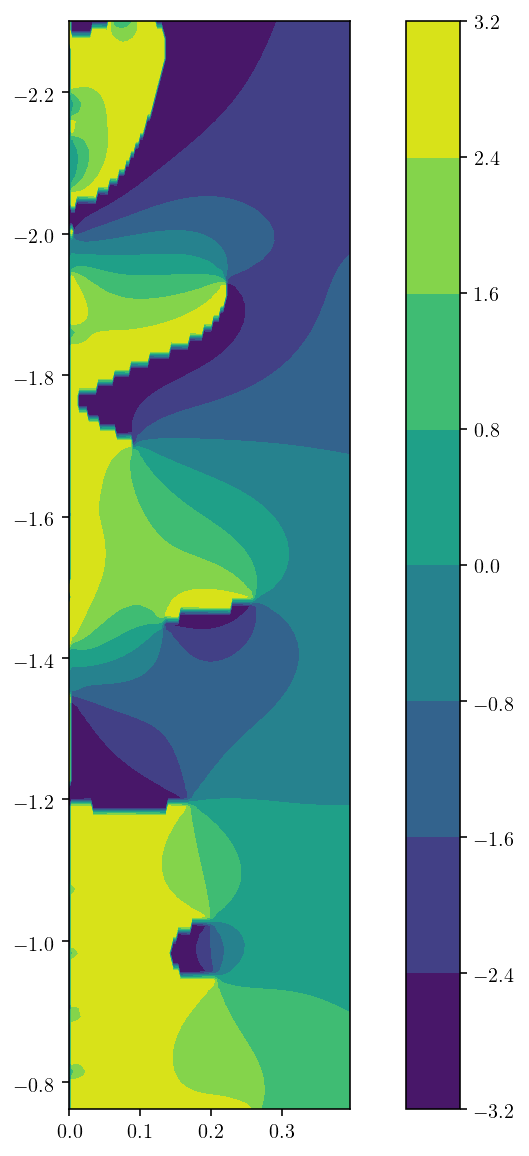

In [16]:
plt.figure(figsize=(10,10))
CS = plt.contourf(Or, Oi, np.angle(Leavers))
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
plt.colorbar(CS)
plt.show()

In [17]:
from scipy import optimize

In [18]:
a = 0.5
s = -2
m = 2

n_inv = 3
Nr = 300
r_N = 0.
l_max = 20

A0 = 4.
omega_guess = 1.-1.j

def leavA(x):
    omega = x[0] + 1.j*x[1]
    A = qnm.angular.sep_const_closest(A0, s, a*omega, m, l_max)
    Leav_err = qnm.radial.leaver_cf_trunc_inversion(omega, a, s, m, A, n_inv, Nr, r_N)
    return [np.real(Leav_err), np.imag(Leav_err)]

sol = optimize.root(leavA, [np.real(omega_guess), np.imag(omega_guess)], tol=1e-10)
print(sol)
omega_sol = sol.x[0] + 1.j*sol.x[1]
print(omega_sol)

    fjac: array([[-0.57359808, -0.81913689],
       [ 0.81913689, -0.57359808]])
     fun: array([-1.33226763e-14, -2.08721929e-14])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([-1.81513595e-12, -8.49256196e-13])
       r: array([-37.83289639, -11.46901807,  -6.65014296])
  status: 1
 success: True
       x: array([ 0.34774125, -0.83259476])
(0.3477412539359394-0.8325947550362678j)


In [19]:
qnm.angular.sep_consts(s, a*omega_sol, m, l_max)

array([  3.64660074+1.21471602j,   9.82630392+0.6137243j ,
        17.91099677+0.38582177j,  27.95981518+0.27679539j,
        39.98983299+0.21636142j,  54.00938032+0.17936711j,
        70.0227435 +0.15505889j,  88.0322533 +0.13821883j,
       108.03924895+0.12606481j, 130.04453913+0.11700177j,
       154.04863361+0.11006122j, 180.05186591+0.10462704j,
       208.05446134+0.10029188j, 238.05657636+0.09677759j,
       270.05832233+0.0938889j , 304.05978018+0.09148542j,
       340.06100989+0.08946407j, 418.04949541+0.07276048j,
       378.06205594+0.08780761j])

In [20]:
qnm.angular.sep_consts(s, 0., 2, 20)

array([  4.+0.j,  10.+0.j,  18.+0.j,  28.+0.j,  40.+0.j,  54.+0.j,
        70.+0.j,  88.+0.j, 108.+0.j, 130.+0.j, 154.+0.j, 180.+0.j,
       208.+0.j, 238.+0.j, 270.+0.j, 304.+0.j, 340.+0.j, 378.+0.j,
       418.+0.j])

# Testing the NearbyRootFinder class

In [6]:
from qnm.nearby import NearbyRootFinder

In [7]:
tol = 1e-10
a = 1e-10
s = -2
m = 2

n_inv = 8
Nr = 300
r_N = 0.
l_max = 20

A0 = 4.
omega_guess = 1.e-15-2.j

In [8]:
finder = NearbyRootFinder(a=a, s=s, m=m, A_closest_to=A0,
                            l_max=l_max, omega_guess=omega_guess,
                            tol=tol, n_inv=n_inv, Nr=Nr, r_N=r_N, Nr_max=6000)

In [9]:
finder.do_solve()

(5.449927616463862e-12-1.9999999631213654j)

In [25]:
finder.get_cf_err()

(4.946943578310056e-09, 5999)

In [26]:
finder.set_params(a=0.1)
finder.set_params(Nr=300)
o1 = finder.do_solve()
finder.set_params(Nr=301)
o2 = finder.do_solve()
print(o1)
print(o1-o2)
print(np.abs(o1-o2))

(0.10061986644253162-2.0846631058683593j)
0j
0.0


In [27]:
finder.set_params(a=0.3)
finder.set_params(l_max=20)
o1 = finder.do_solve()
finder.set_params(l_max=21)
o2 = finder.do_solve()
print(o1)
print(o1-o2)
print(np.abs(o1-o2))

(0.004876401732206959-1.9997321614437211j)
(-1.1474473281258835e-11+9.555911617553647e-12j)
1.493248083624485e-11


# Testing the KerrSpinSeq class

In [7]:
import time

In [8]:
from qnm.spinsequence import KerrSpinSeq

In [9]:
qnm_dict = qnm.schwarzschild.tabulated.QNMDict(init=True)

INFO:root:Loading Schw QNM dict from file /Users/leo/src/spectral_qnms/qnm/schwarzschild/data/Schw_dict.pickle


In [13]:
start = time.time()

a_max = .998
tol=1e-10

ns=np.arange(0,8)
ns=[7]
s=-2
ls=np.arange(2,5)
ls = [3]
seqs = {}
for l in ls:
    ms=np.arange(-l,l+1)
    for m in ms:
        for n in ns:
            seqs[(l,m,n)] = KerrSpinSeq(n=n, a_max=a_max, delta_a=4e-3, s=s, l=l, m=m)
            seqs[(l,m,n)].do_find_sequence()

end = time.time()

print(end - start)

INFO:root:l=3, m=-3, n=7 starting
INFO:root:l=3, m=-3, n=7 completed with 251 points
INFO:root:l=3, m=-2, n=7 starting
INFO:root:l=3, m=-2, n=7 completed with 251 points
INFO:root:l=3, m=-1, n=7 starting
INFO:root:l=3, m=-1, n=7 completed with 251 points
INFO:root:l=3, m=0, n=7 starting
INFO:root:l=3, m=0, n=7 completed with 251 points
INFO:root:l=3, m=1, n=7 starting
INFO:root:l=3, m=1, n=7 completed with 264 points
INFO:root:l=3, m=2, n=7 starting
INFO:root:l=3, m=2, n=7 completed with 270 points
INFO:root:l=3, m=3, n=7 starting
INFO:root:l=3, m=3, n=7 completed with 284 points


14.9529409409


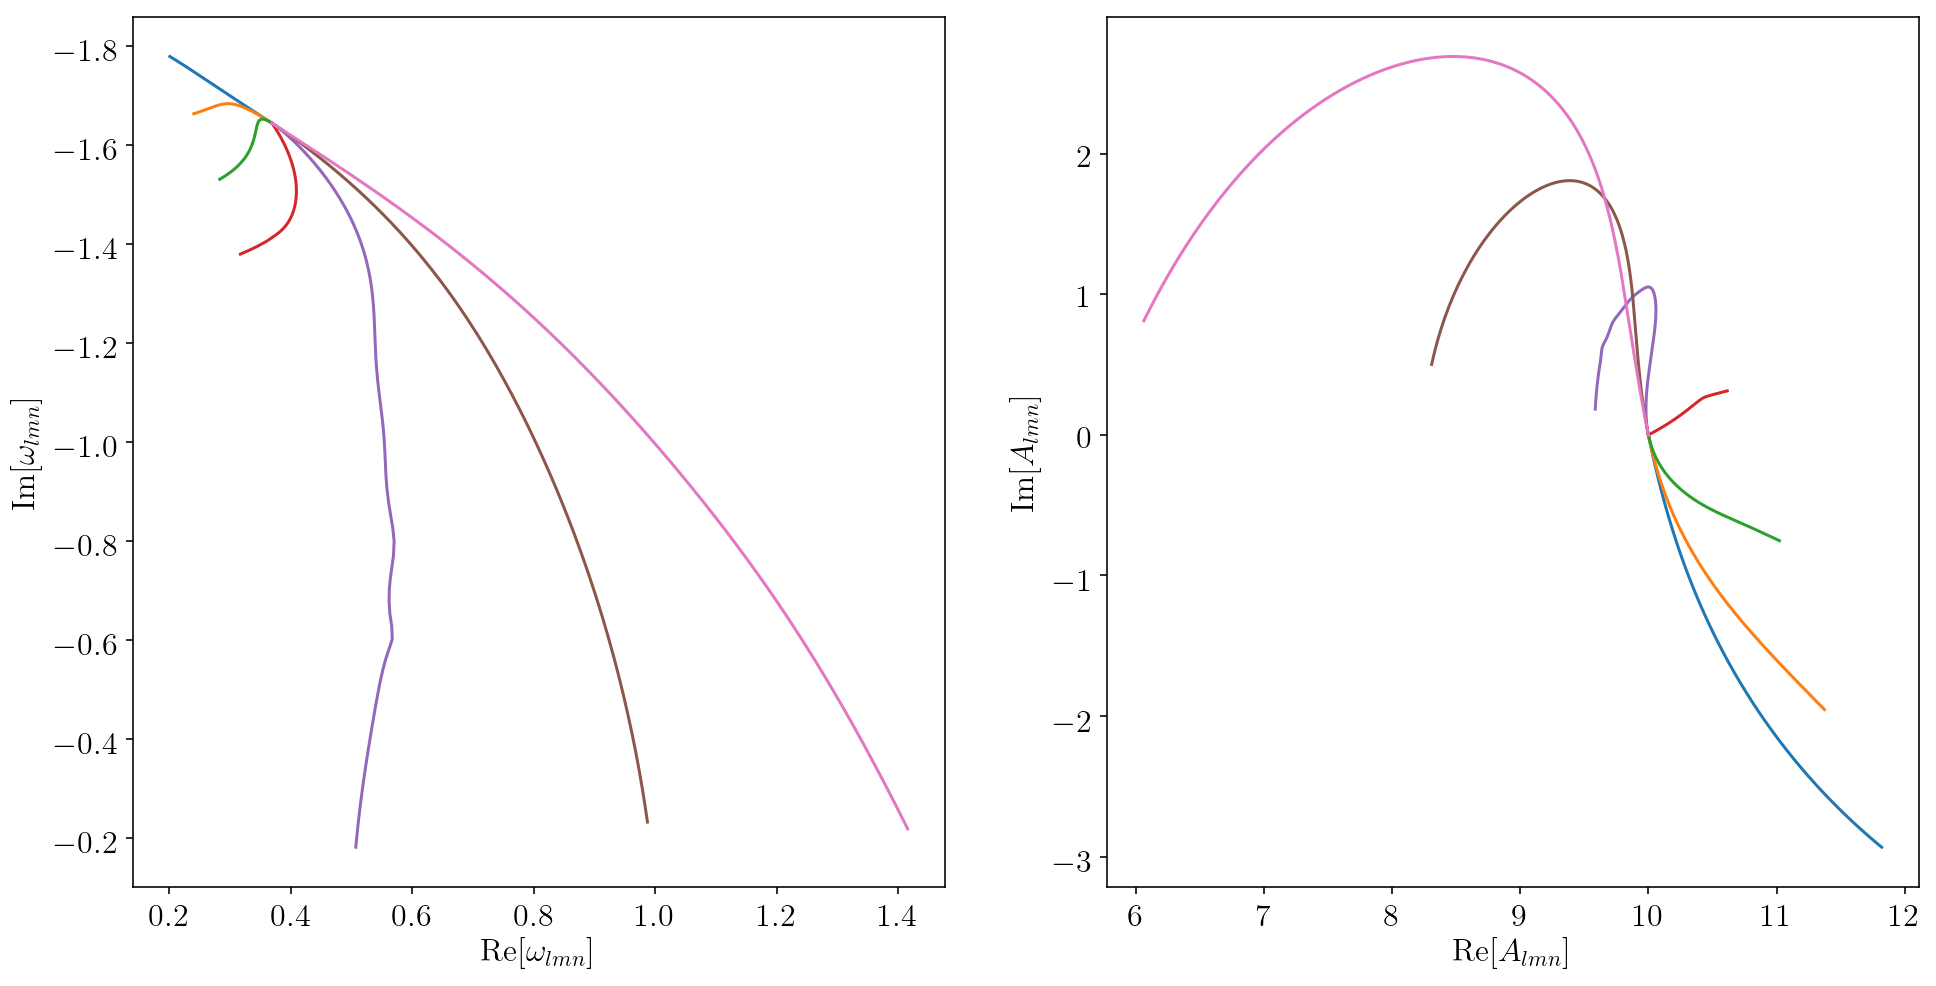

In [14]:
ns=np.arange(0,8)
ns=[7]
s=-2
ls=np.arange(2,5)
ls = [3]

plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)

for l in ls:
    ms = np.arange(-l, l+1)
    for m in ms:
        for n in ns:
            plt.plot(np.real(seqs[(l,m,n)].omega), np.imag(seqs[(l,m,n)].omega))

#plt.xlim(.07,.13)
#plt.ylim(-1.48,-1.455)

plt.gca().invert_yaxis()
plt.gca().tick_params(labelsize=16)
plt.xlabel(r'$\textrm{Re}[\omega_{lmn}]$', fontsize=16)
plt.ylabel(r'$\textrm{Im}[\omega_{lmn}]$', fontsize=16)

plt.subplot(1, 2, 2)

for l in ls:
    ms = np.arange(-l, l+1)
    for m in ms:
        for n in ns:
            plt.plot(np.real(seqs[(l,m,n)].A), np.imag(seqs[(l,m,n)].A))

plt.gca().tick_params(labelsize=16)
plt.xlabel(r'$\textrm{Re}[A_{lmn}]$', fontsize=16)
plt.ylabel(r'$\textrm{Im}[A_{lmn}]$', fontsize=16)

plt.savefig("test.png", bbox_inches="tight", dpi=300)

plt.show()

In [29]:
start = time.time()

a_max = .9995
tol=1e-10

ns=np.arange(0,7)
s=-2
ls=np.arange(2,8)
seqs = {}
for l in ls:
    ms=np.arange(-l,l+1)
    for m in ms:
        for n in ns:
            seqs[(l,m,n)] = KerrSpinSeq(n=n, a_max=a_max, delta_a=2.5e-3, s=s, l=l, m=m)
            try:
                seqs[(l,m,n)].do_find_sequence()
            except:
                print("Sadness at l={}, m={}, n={}".format(l,m,n))
        
end = time.time()

print(end - start)

INFO:root:l=2, m=-2, n=0 starting
INFO:root:l=2, m=-2, n=0 completed with 252 points
INFO:root:l=2, m=-2, n=1 starting
INFO:root:l=2, m=-2, n=1 completed with 252 points
INFO:root:l=2, m=-2, n=2 starting
INFO:root:l=2, m=-2, n=2 completed with 252 points
INFO:root:l=2, m=-2, n=3 starting
INFO:root:l=2, m=-2, n=3 completed with 252 points
INFO:root:l=2, m=-2, n=4 starting
INFO:root:l=2, m=-2, n=4 completed with 252 points
INFO:root:l=2, m=-2, n=5 starting
INFO:root:l=2, m=-2, n=5 completed with 252 points
INFO:root:l=2, m=-2, n=6 starting
INFO:root:l=2, m=-2, n=6 completed with 252 points
INFO:root:l=2, m=-1, n=0 starting
INFO:root:l=2, m=-1, n=0 completed with 252 points
INFO:root:l=2, m=-1, n=1 starting
INFO:root:l=2, m=-1, n=1 completed with 252 points
INFO:root:l=2, m=-1, n=2 starting
INFO:root:l=2, m=-1, n=2 completed with 252 points
INFO:root:l=2, m=-1, n=3 starting
INFO:root:l=2, m=-1, n=3 completed with 252 points
INFO:root:l=2, m=-1, n=4 starting
INFO:root:l=2, m=-1, n=4 comple

INFO:root:l=4, m=-2, n=0 starting
INFO:root:l=4, m=-2, n=0 completed with 252 points
INFO:root:l=4, m=-2, n=1 starting
INFO:root:l=4, m=-2, n=1 completed with 252 points
INFO:root:l=4, m=-2, n=2 starting
INFO:root:l=4, m=-2, n=2 completed with 252 points
INFO:root:l=4, m=-2, n=3 starting
INFO:root:l=4, m=-2, n=3 completed with 252 points
INFO:root:l=4, m=-2, n=4 starting
INFO:root:l=4, m=-2, n=4 completed with 252 points
INFO:root:l=4, m=-2, n=5 starting
INFO:root:l=4, m=-2, n=5 completed with 252 points
INFO:root:l=4, m=-2, n=6 starting
INFO:root:l=4, m=-2, n=6 completed with 252 points
INFO:root:l=4, m=-1, n=0 starting
INFO:root:l=4, m=-1, n=0 completed with 252 points
INFO:root:l=4, m=-1, n=1 starting
INFO:root:l=4, m=-1, n=1 completed with 252 points
INFO:root:l=4, m=-1, n=2 starting
INFO:root:l=4, m=-1, n=2 completed with 252 points
INFO:root:l=4, m=-1, n=3 starting
INFO:root:l=4, m=-1, n=3 completed with 252 points
INFO:root:l=4, m=-1, n=4 starting
INFO:root:l=4, m=-1, n=4 comple

Sadness at l=5, m=-5, n=6


INFO:root:l=5, m=-4, n=0 completed with 252 points
INFO:root:l=5, m=-4, n=1 starting
INFO:root:l=5, m=-4, n=1 completed with 252 points
INFO:root:l=5, m=-4, n=2 starting
INFO:root:l=5, m=-4, n=2 completed with 252 points
INFO:root:l=5, m=-4, n=3 starting
INFO:root:l=5, m=-4, n=3 completed with 252 points
INFO:root:l=5, m=-4, n=4 starting
INFO:root:l=5, m=-4, n=4 completed with 252 points
INFO:root:l=5, m=-4, n=5 starting
INFO:root:l=5, m=-4, n=6 starting


Sadness at l=5, m=-4, n=5


INFO:root:l=5, m=-4, n=6 completed with 252 points
INFO:root:l=5, m=-3, n=0 starting
INFO:root:l=5, m=-3, n=0 completed with 252 points
INFO:root:l=5, m=-3, n=1 starting
INFO:root:l=5, m=-3, n=1 completed with 252 points
INFO:root:l=5, m=-3, n=2 starting
INFO:root:l=5, m=-3, n=2 completed with 252 points
INFO:root:l=5, m=-3, n=3 starting
INFO:root:l=5, m=-3, n=3 completed with 252 points
INFO:root:l=5, m=-3, n=4 starting
INFO:root:l=5, m=-3, n=4 completed with 252 points
INFO:root:l=5, m=-3, n=5 starting
INFO:root:l=5, m=-3, n=5 completed with 252 points
INFO:root:l=5, m=-3, n=6 starting
INFO:root:l=5, m=-3, n=6 completed with 252 points
INFO:root:l=5, m=-2, n=0 starting
INFO:root:l=5, m=-2, n=0 completed with 252 points
INFO:root:l=5, m=-2, n=1 starting
INFO:root:l=5, m=-2, n=1 completed with 252 points
INFO:root:l=5, m=-2, n=2 starting
INFO:root:l=5, m=-2, n=2 completed with 252 points
INFO:root:l=5, m=-2, n=3 starting
INFO:root:l=5, m=-2, n=3 completed with 252 points
INFO:root:l=5,

Sadness at l=6, m=-6, n=5


INFO:root:l=6, m=-6, n=6 completed with 252 points
INFO:root:l=6, m=-5, n=0 starting
INFO:root:l=6, m=-5, n=0 completed with 252 points
INFO:root:l=6, m=-5, n=1 starting
INFO:root:l=6, m=-5, n=1 completed with 252 points
INFO:root:l=6, m=-5, n=2 starting
INFO:root:l=6, m=-5, n=2 completed with 252 points
INFO:root:l=6, m=-5, n=3 starting
INFO:root:l=6, m=-5, n=3 completed with 252 points
INFO:root:l=6, m=-5, n=4 starting
INFO:root:l=6, m=-5, n=4 completed with 252 points
INFO:root:l=6, m=-5, n=5 starting
INFO:root:l=6, m=-5, n=5 completed with 252 points
INFO:root:l=6, m=-5, n=6 starting
INFO:root:l=6, m=-5, n=6 completed with 252 points
INFO:root:l=6, m=-4, n=0 starting
INFO:root:l=6, m=-4, n=0 completed with 252 points
INFO:root:l=6, m=-4, n=1 starting
INFO:root:l=6, m=-4, n=1 completed with 252 points
INFO:root:l=6, m=-4, n=2 starting
INFO:root:l=6, m=-4, n=2 completed with 252 points
INFO:root:l=6, m=-4, n=3 starting
INFO:root:l=6, m=-4, n=3 completed with 252 points
INFO:root:l=6,

Sadness at l=6, m=-4, n=5


INFO:root:l=6, m=-3, n=0 starting


Sadness at l=6, m=-4, n=6


INFO:root:l=6, m=-3, n=0 completed with 252 points
INFO:root:l=6, m=-3, n=1 starting
INFO:root:l=6, m=-3, n=1 completed with 252 points
INFO:root:l=6, m=-3, n=2 starting
INFO:root:l=6, m=-3, n=2 completed with 252 points
INFO:root:l=6, m=-3, n=3 starting
INFO:root:l=6, m=-3, n=3 completed with 252 points
INFO:root:l=6, m=-3, n=4 starting
INFO:root:l=6, m=-3, n=4 completed with 252 points
INFO:root:l=6, m=-3, n=5 starting
INFO:root:l=6, m=-3, n=5 completed with 252 points
INFO:root:l=6, m=-3, n=6 starting
INFO:root:l=6, m=-3, n=6 completed with 252 points
INFO:root:l=6, m=-2, n=0 starting
INFO:root:l=6, m=-2, n=0 completed with 252 points
INFO:root:l=6, m=-2, n=1 starting
INFO:root:l=6, m=-2, n=1 completed with 252 points
INFO:root:l=6, m=-2, n=2 starting
INFO:root:l=6, m=-2, n=2 completed with 252 points
INFO:root:l=6, m=-2, n=3 starting
INFO:root:l=6, m=-2, n=3 completed with 252 points
INFO:root:l=6, m=-2, n=4 starting
INFO:root:l=6, m=-2, n=4 completed with 252 points
INFO:root:l=6,

Sadness at l=6, m=0, n=6


INFO:root:l=6, m=1, n=0 completed with 252 points
INFO:root:l=6, m=1, n=1 starting
INFO:root:l=6, m=1, n=1 completed with 252 points
INFO:root:l=6, m=1, n=2 starting
INFO:root:l=6, m=1, n=2 completed with 252 points
INFO:root:l=6, m=1, n=3 starting
INFO:root:l=6, m=1, n=3 completed with 252 points
INFO:root:l=6, m=1, n=4 starting
INFO:root:l=6, m=1, n=4 completed with 252 points
INFO:root:l=6, m=1, n=5 starting
INFO:root:l=6, m=1, n=6 starting


Sadness at l=6, m=1, n=5


INFO:root:l=6, m=1, n=6 completed with 252 points
INFO:root:l=6, m=2, n=0 starting
INFO:root:l=6, m=2, n=0 completed with 252 points
INFO:root:l=6, m=2, n=1 starting
INFO:root:l=6, m=2, n=1 completed with 252 points
INFO:root:l=6, m=2, n=2 starting
INFO:root:l=6, m=2, n=2 completed with 252 points
INFO:root:l=6, m=2, n=3 starting
INFO:root:l=6, m=2, n=3 completed with 252 points
INFO:root:l=6, m=2, n=4 starting
INFO:root:l=6, m=2, n=4 completed with 252 points
INFO:root:l=6, m=2, n=5 starting
INFO:root:l=6, m=2, n=5 completed with 252 points
INFO:root:l=6, m=2, n=6 starting
INFO:root:l=6, m=2, n=6 completed with 252 points
INFO:root:l=6, m=3, n=0 starting
INFO:root:l=6, m=3, n=0 completed with 252 points
INFO:root:l=6, m=3, n=1 starting
INFO:root:l=6, m=3, n=1 completed with 252 points
INFO:root:l=6, m=3, n=2 starting
INFO:root:l=6, m=3, n=2 completed with 252 points
INFO:root:l=6, m=3, n=3 starting
INFO:root:l=6, m=3, n=3 completed with 252 points
INFO:root:l=6, m=3, n=4 starting
INFO

Sadness at l=7, m=-7, n=5


INFO:root:l=7, m=-7, n=6 completed with 252 points
INFO:root:l=7, m=-6, n=0 starting
INFO:root:l=7, m=-6, n=0 completed with 252 points
INFO:root:l=7, m=-6, n=1 starting
INFO:root:l=7, m=-6, n=1 completed with 252 points
INFO:root:l=7, m=-6, n=2 starting
INFO:root:l=7, m=-6, n=2 completed with 252 points
INFO:root:l=7, m=-6, n=3 starting
INFO:root:l=7, m=-6, n=3 completed with 252 points
INFO:root:l=7, m=-6, n=4 starting
INFO:root:l=7, m=-6, n=4 completed with 252 points
INFO:root:l=7, m=-6, n=5 starting
INFO:root:l=7, m=-6, n=5 completed with 252 points
INFO:root:l=7, m=-6, n=6 starting
INFO:root:l=7, m=-5, n=0 starting


Sadness at l=7, m=-6, n=6


INFO:root:l=7, m=-5, n=0 completed with 252 points
INFO:root:l=7, m=-5, n=1 starting
INFO:root:l=7, m=-5, n=1 completed with 252 points
INFO:root:l=7, m=-5, n=2 starting
INFO:root:l=7, m=-5, n=2 completed with 252 points
INFO:root:l=7, m=-5, n=3 starting
INFO:root:l=7, m=-5, n=3 completed with 252 points
INFO:root:l=7, m=-5, n=4 starting
INFO:root:l=7, m=-5, n=4 completed with 252 points
INFO:root:l=7, m=-5, n=5 starting
INFO:root:l=7, m=-5, n=5 completed with 252 points
INFO:root:l=7, m=-5, n=6 starting
INFO:root:l=7, m=-4, n=0 starting


Sadness at l=7, m=-5, n=6


INFO:root:l=7, m=-4, n=0 completed with 252 points
INFO:root:l=7, m=-4, n=1 starting
INFO:root:l=7, m=-4, n=1 completed with 252 points
INFO:root:l=7, m=-4, n=2 starting
INFO:root:l=7, m=-4, n=2 completed with 252 points
INFO:root:l=7, m=-4, n=3 starting
INFO:root:l=7, m=-4, n=3 completed with 252 points
INFO:root:l=7, m=-4, n=4 starting
INFO:root:l=7, m=-4, n=4 completed with 252 points
INFO:root:l=7, m=-4, n=5 starting
INFO:root:l=7, m=-4, n=5 completed with 252 points
INFO:root:l=7, m=-4, n=6 starting
INFO:root:l=7, m=-4, n=6 completed with 252 points
INFO:root:l=7, m=-3, n=0 starting
INFO:root:l=7, m=-3, n=0 completed with 252 points
INFO:root:l=7, m=-3, n=1 starting
INFO:root:l=7, m=-3, n=1 completed with 252 points
INFO:root:l=7, m=-3, n=2 starting
INFO:root:l=7, m=-3, n=2 completed with 252 points
INFO:root:l=7, m=-3, n=3 starting
INFO:root:l=7, m=-3, n=3 completed with 252 points
INFO:root:l=7, m=-3, n=4 starting
INFO:root:l=7, m=-3, n=4 completed with 252 points
INFO:root:l=7,

Sadness at l=7, m=-3, n=6


INFO:root:l=7, m=-2, n=0 completed with 252 points
INFO:root:l=7, m=-2, n=1 starting
INFO:root:l=7, m=-2, n=1 completed with 252 points
INFO:root:l=7, m=-2, n=2 starting
INFO:root:l=7, m=-2, n=2 completed with 252 points
INFO:root:l=7, m=-2, n=3 starting
INFO:root:l=7, m=-2, n=3 completed with 252 points
INFO:root:l=7, m=-2, n=4 starting
INFO:root:l=7, m=-2, n=4 completed with 252 points
INFO:root:l=7, m=-2, n=5 starting
INFO:root:l=7, m=-2, n=6 starting


Sadness at l=7, m=-2, n=5


INFO:root:l=7, m=-2, n=6 completed with 252 points
INFO:root:l=7, m=-1, n=0 starting
INFO:root:l=7, m=-1, n=0 completed with 252 points
INFO:root:l=7, m=-1, n=1 starting
INFO:root:l=7, m=-1, n=1 completed with 252 points
INFO:root:l=7, m=-1, n=2 starting
INFO:root:l=7, m=-1, n=2 completed with 252 points
INFO:root:l=7, m=-1, n=3 starting
INFO:root:l=7, m=-1, n=3 completed with 252 points
INFO:root:l=7, m=-1, n=4 starting
INFO:root:l=7, m=-1, n=4 completed with 252 points
INFO:root:l=7, m=-1, n=5 starting
INFO:root:l=7, m=-1, n=5 completed with 252 points
INFO:root:l=7, m=-1, n=6 starting
INFO:root:l=7, m=0, n=0 starting


Sadness at l=7, m=-1, n=6


INFO:root:l=7, m=0, n=0 completed with 252 points
INFO:root:l=7, m=0, n=1 starting
INFO:root:l=7, m=0, n=1 completed with 252 points
INFO:root:l=7, m=0, n=2 starting
INFO:root:l=7, m=0, n=2 completed with 252 points
INFO:root:l=7, m=0, n=3 starting
INFO:root:l=7, m=0, n=3 completed with 252 points
INFO:root:l=7, m=0, n=4 starting
INFO:root:l=7, m=0, n=4 completed with 252 points
INFO:root:l=7, m=0, n=5 starting
INFO:root:l=7, m=0, n=5 completed with 252 points
INFO:root:l=7, m=0, n=6 starting
INFO:root:l=7, m=0, n=6 completed with 252 points
INFO:root:l=7, m=1, n=0 starting
INFO:root:l=7, m=1, n=0 completed with 252 points
INFO:root:l=7, m=1, n=1 starting
INFO:root:l=7, m=1, n=1 completed with 252 points
INFO:root:l=7, m=1, n=2 starting
INFO:root:l=7, m=1, n=2 completed with 252 points
INFO:root:l=7, m=1, n=3 starting
INFO:root:l=7, m=1, n=3 completed with 252 points
INFO:root:l=7, m=1, n=4 starting
INFO:root:l=7, m=1, n=4 completed with 252 points
INFO:root:l=7, m=1, n=5 starting
INFO

854.689414024


In [30]:
reruns = [(-2,5,-5,6), (-2,5,-4,5), (-2,6,-6,5), (-2,6,-4,5),
          (-2,6,-4,6), (-2,6,0,6),  (-2,6,1,5),  (-2,7,-7,5), 
          (-2,7,-6,6), (-2,7,-5,6), (-2,7,-3,6), (-2,7,-2,5), 
          (-2,7,-1,6) ]

In [90]:
start = time.time()

a_max = .9995
tol=1e-10

for s,l,m,n in reruns:
    seqs[(s,l,m,n)] = KerrSpinSeq(n=n, a_max=a_max, delta_a=1.9e-3, s=s, l=l, m=m)
    seqs[(s,l,m,n)].do_find_sequence()
        
end = time.time()

print(end - start)

INFO:root:l=7, m=-1, n=6 starting
INFO:root:l=7, m=-1, n=6 completed with 252 points
INFO:root:l=6, m=-6, n=5 starting
INFO:root:l=6, m=-6, n=5 completed with 252 points


3.95491290092


In [92]:
ns=np.arange(0,7)
s=-2
ls=np.arange(2,8)
seqs = {}
for l in ls:
    ms=np.arange(-l,l+1)
    for m in ms:
        for n in ns:
            seqs[s,l,m,n] = qnm.cached.load_cached_mode(s,l,m,n)

INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l2_m-2_n0.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l2_m-2_n1.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l2_m-2_n2.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l2_m-2_n3.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l2_m-2_n4.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l2_m-2_n5.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l2_m-2_n6.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l2_m-1_n0.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l2_m-1_n1.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/le

INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l3_m3_n2.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l3_m3_n3.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l3_m3_n4.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l3_m3_n5.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l3_m3_n6.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l4_m-4_n0.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l4_m-4_n1.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l4_m-4_n2.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l4_m-4_n3.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src

INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l5_m-4_n4.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l5_m-4_n5.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l5_m-4_n6.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l5_m-3_n0.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l5_m-3_n1.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l5_m-3_n2.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l5_m-3_n3.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l5_m-3_n4.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l5_m-3_n5.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/le

INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l6_m-5_n6.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l6_m-4_n0.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l6_m-4_n1.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l6_m-4_n2.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l6_m-4_n3.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l6_m-4_n4.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l6_m-4_n5.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l6_m-4_n6.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l6_m-3_n0.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/le

INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m-7_n1.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m-7_n2.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m-7_n3.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m-7_n4.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m-7_n5.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m-7_n6.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m-6_n0.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m-6_n1.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m-6_n2.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/le

INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m4_n3.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m4_n4.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m4_n5.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m4_n6.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m5_n0.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m5_n1.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m5_n2.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m5_n3.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m5_n4.pickle
INFO:root:Loading Kerr QNM sequence from file /Users/leo/src/spe

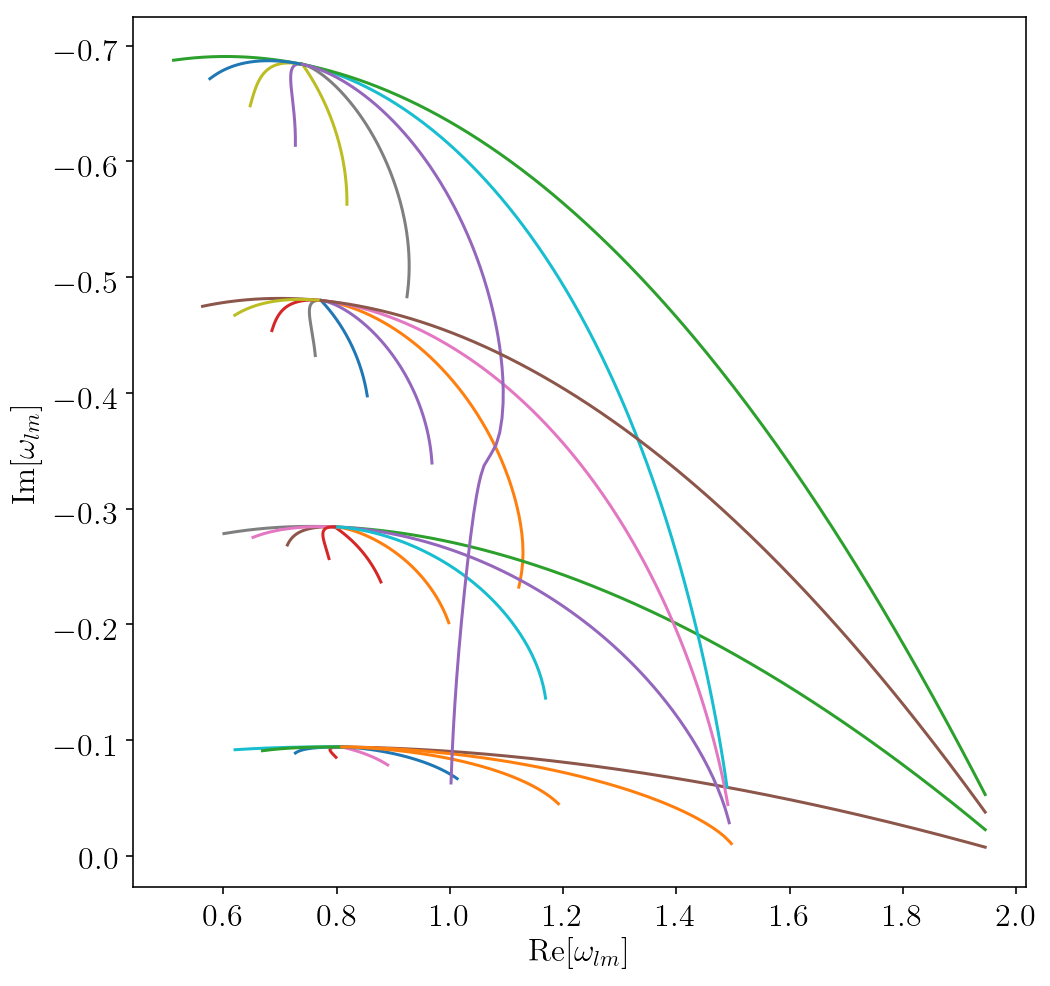

In [26]:
plt.figure(figsize=(8,8))

for (l,m,n), seq in seqs.iteritems():
    plt.plot(np.real(seq.omega), np.imag(seq.omega))
#plt.xlim(-1.5, 1.5)
#plt.ylim(-1.7,0.)

plt.gca().invert_yaxis()
plt.gca().tick_params(labelsize=16)
plt.xlabel(r'$\textrm{Re}[\omega_{lm}]$', fontsize=16)
plt.ylabel(r'$\textrm{Im}[\omega_{lm}]$', fontsize=16)
plt.savefig("test.png", bbox_inches="tight", dpi=300)
plt.show()

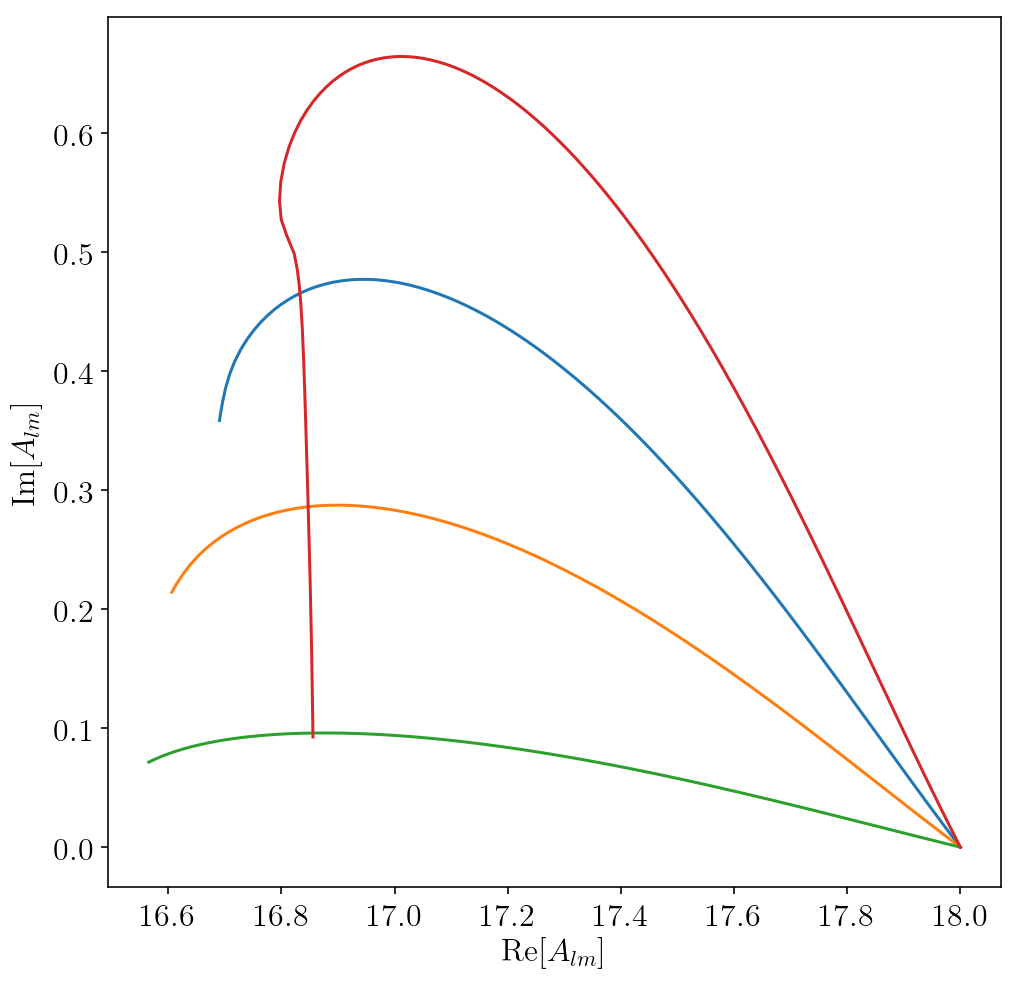

In [27]:
plt.figure(figsize=(8,8))

for (l,m,n), seq in seqs.iteritems():
    if (m==2):
        plt.plot(np.real(seq.A), np.imag(seq.A))

plt.gca().tick_params(labelsize=16)
plt.xlabel(r'$\textrm{Re}[A_{lm}]$', fontsize=16)
plt.ylabel(r'$\textrm{Im}[A_{lm}]$', fontsize=16)
# plt.savefig("test.png", bbox_inches="tight", dpi=300)

plt.show()

In [31]:
for k, v in seqs.items():
    qnm.cached.write_mode(v)

INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l3_m0_n3.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m1_n3.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l5_m-4_n5.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l5_m2_n1.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m-3_n4.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m-5_n0.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l4_m-2_n6.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l5_m5_n5.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l3_m1_n4.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/d

INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l6_m-3_n1.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l5_m-2_n0.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l5_m-1_n0.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l4_m3_n1.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l6_m-2_n5.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l6_m1_n3.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l3_m3_n4.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m0_n6.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l4_m0_n5.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/d

INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m-4_n6.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l3_m-3_n0.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m5_n0.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l6_m0_n3.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l3_m0_n6.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m1_n0.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l5_m4_n4.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l4_m1_n4.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m-3_n1.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/da

INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l6_m-2_n2.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l3_m3_n1.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l4_m-4_n4.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l4_m0_n2.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l6_m-5_n0.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l6_m2_n4.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l6_m4_n0.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l5_m-2_n3.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m-6_n4.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/

INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m-5_n6.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l3_m-1_n0.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l2_m0_n5.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m2_n1.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l4_m-2_n4.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l5_m5_n3.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l3_m1_n6.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l3_m-3_n5.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l6_m0_n4.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/d

INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l4_m-4_n1.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l5_m1_n0.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l6_m-5_n3.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l6_m2_n1.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l5_m-1_n6.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l7_m-6_n3.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l5_m-1_n1.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l2_m1_n4.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/data/s-2_l5_m4_n6.pickle
INFO:root:Writing Kerr QNM sequence to file /Users/leo/src/spectral_qnms/qnm/

# Testing QNMDict

In [23]:
from qnm.schwarzschild.tabulated import QNMDict

In [24]:
qnm_dict = QNMDict(init=True)

INFO:root:Loading Schw QNM dict from file /Users/leo/src/spectral_qnms/qnm/schwarzschild/data/Schw_dict.pickle


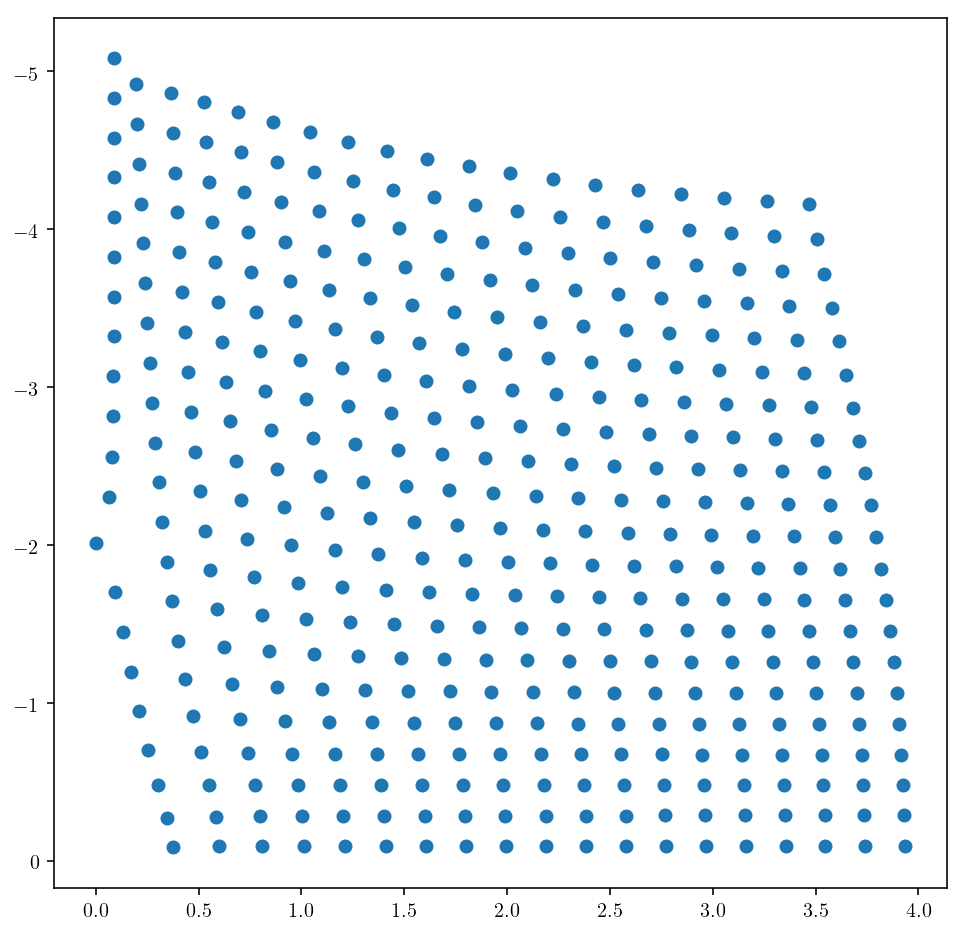

In [25]:
s=-2
l_max=20
n_max=20
oms = [ qnm_dict(s,l,n)[0] for l in range(np.abs(s),l_max+1) for n in range(0,n_max+1) ]
plt.figure(figsize=(8,8))
plt.scatter(np.real(oms),np.imag(oms))
plt.gca().invert_yaxis()
plt.show()